In [12]:
# %% 

""" Created on November 13, 2023 // @author: Sarah Shi """

import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# !pip install Cython hdbscan
# !pip install -i https://test.pypi.org/simple/ mineralML==0.0.0.4
import mineralML as mm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


We have loaded in the mineralML Python package with trained machine learning models for classifying minerals. Examples workflows working with these spectra can be found on the [ReadTheDocs](https://mineralML.readthedocs.io/en/latest/). 

The Google Colab implementation here aims to get your electron microprobe compositions classified and processes. We remove degrees of freedom to simplify the process. The igneous minerals considered for this study include: amphibole, apatite, biotite, clinopyroxene, garnet, ilmenite, K-feldspar, magnetite, muscovite, olivine, orthopyroxene, plagioclase, quartz, rutile, spinel, tourmaline, and zircon. 

The files necessary include a CSV file containing your electron microprobe analyses in oxide weight percentages. Find an example [here](https://github.com/sarahshi/mineralML/blob/main/Validation_Data/lepr_allphases_lim.csv). The necessary oxides are $SiO_2$, $TiO_2$, $Al_2O_3$, $FeO_t$, $MnO$, $MgO$, $CaO$, $Na_2O$, $K_2O$, $Cr_2O_3$. For the oxides not analyzed for specific minerals, the preprocessing will fill in the nan values as 0. 

We will apply both supervised and unsupervised machine learning models to the dataset. 

# I. Supervised Machine Learning with Bayesian Neural Networks with Variational Inference

# Load your CSV file here: 

# Read in the CSV file and prepare for analysis (fill in nans, limit to trained igneous minerals): 

In [14]:

# Read in your dataframe of mineral data, called DF.csv. 
# Prepare the dataframe by removing rows with too many NaNs, filling some with zeros, and filtering to the minerals described by mineralML. 

df_load = mm.load_df('Validation_Data/testfile.csv')
df_nn, _ = mm.prep_df_nn(df_load)


# Apply the Bayesian neural network with variational inference to your data:

In [15]:

df_pred_nn, probability_matrix = mm.predict_class_prob_nn(df_nn)


# Examine the classifications report for your microanalyses, plot performance: 

In [16]:

df_pred_nn


,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Mineral,Predict_Mineral,Predict_Probability
0,47.240002,1.58,11.74,14.050000,0.25,11.11,10.12,1.69,0.82,0.00,Amphibole,Amphibole,0.940707
1,50.110001,1.71,9.42,15.250000,0.23,11.65,9.84,1.42,0.81,0.00,Amphibole,Amphibole,0.922032
2,47.810001,1.56,11.19,14.250000,0.27,12.30,10.04,1.64,0.77,0.00,Amphibole,Amphibole,0.942601
3,45.410000,1.37,10.97,16.770000,0.32,11.60,10.14,1.61,0.57,0.00,Amphibole,Amphibole,0.935853
4,47.970001,1.73,8.36,17.629999,0.27,12.10,9.44,1.29,0.59,0.00,Amphibole,Amphibole,0.918721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12521,0.000000,1.99,7.94,66.600000,0.00,11.59,0.00,0.00,0.00,1.39,Spinel,Magnetite,0.939355
12522,0.000000,1.44,14.74,51.440000,0.00,6.89,0.00,0.00,0.00,22.85,Spinel,Spinel,0.852840
12523,0.000000,23.64,2.24,64.410000,0.00,2.41,0.00,0.00,0.00,1.01,Spinel,Ilmenite,0.518014
12524,0.000000,0.40,14.93,24.340000,0.00,7.40,0.00,0.00,0.00,48.89,Spinel,Spinel,0.988570


In [17]:

# Create a classification report to determine the accuracy, precision, f1, etc. 

bayes_valid_report = classification_report(
    df_nn['Mineral'], df_pred_nn['Predict_Mineral'], zero_division=0
)
print("LEPR Validation Report:\n", bayes_valid_report)


LEPR Validation Report:
                precision    recall  f1-score   support

    Amphibole       0.39      0.96      0.55       517
      Biotite       1.00      0.94      0.97       200
Clinopyroxene       0.98      0.69      0.81      3251
       Garnet       0.99      0.83      0.90      1446
     Ilmenite       0.00      0.00      0.00         0
    KFeldspar       0.99      0.80      0.89       168
    Magnetite       0.00      0.00      0.00         0
    Muscovite       0.46      1.00      0.63        11
      Olivine       1.00      0.99      1.00      2307
Orthopyroxene       0.80      0.99      0.89      1593
  Plagioclase       0.93      0.99      0.96      1673
       Spinel       1.00      0.52      0.68      1360

     accuracy                           0.84     12526
    macro avg       0.71      0.73      0.69     12526
 weighted avg       0.93      0.84      0.86     12526



LEPR Confusion Matrix:
                Amphibole  Biotite  Clinopyroxene  Garnet  Ilmenite  KFeldspar  \
Amphibole            495        0             11       9         0          0   
Biotite                0      189              0       1         0          0   
Clinopyroxene        661        0           2227       1         0          0   
Garnet               107        0             23    1201         0          0   
Ilmenite               0        0              0       0         0          0   
KFeldspar              1        0              0       0         0        135   
Magnetite              0        0              0       0         0          0   
Muscovite              0        0              0       0         0          0   
Olivine                0        0              2       2         0          0   
Orthopyroxene          5        0              2       3         0          0   
Plagioclase            1        0              4       0         0          1   
Spin

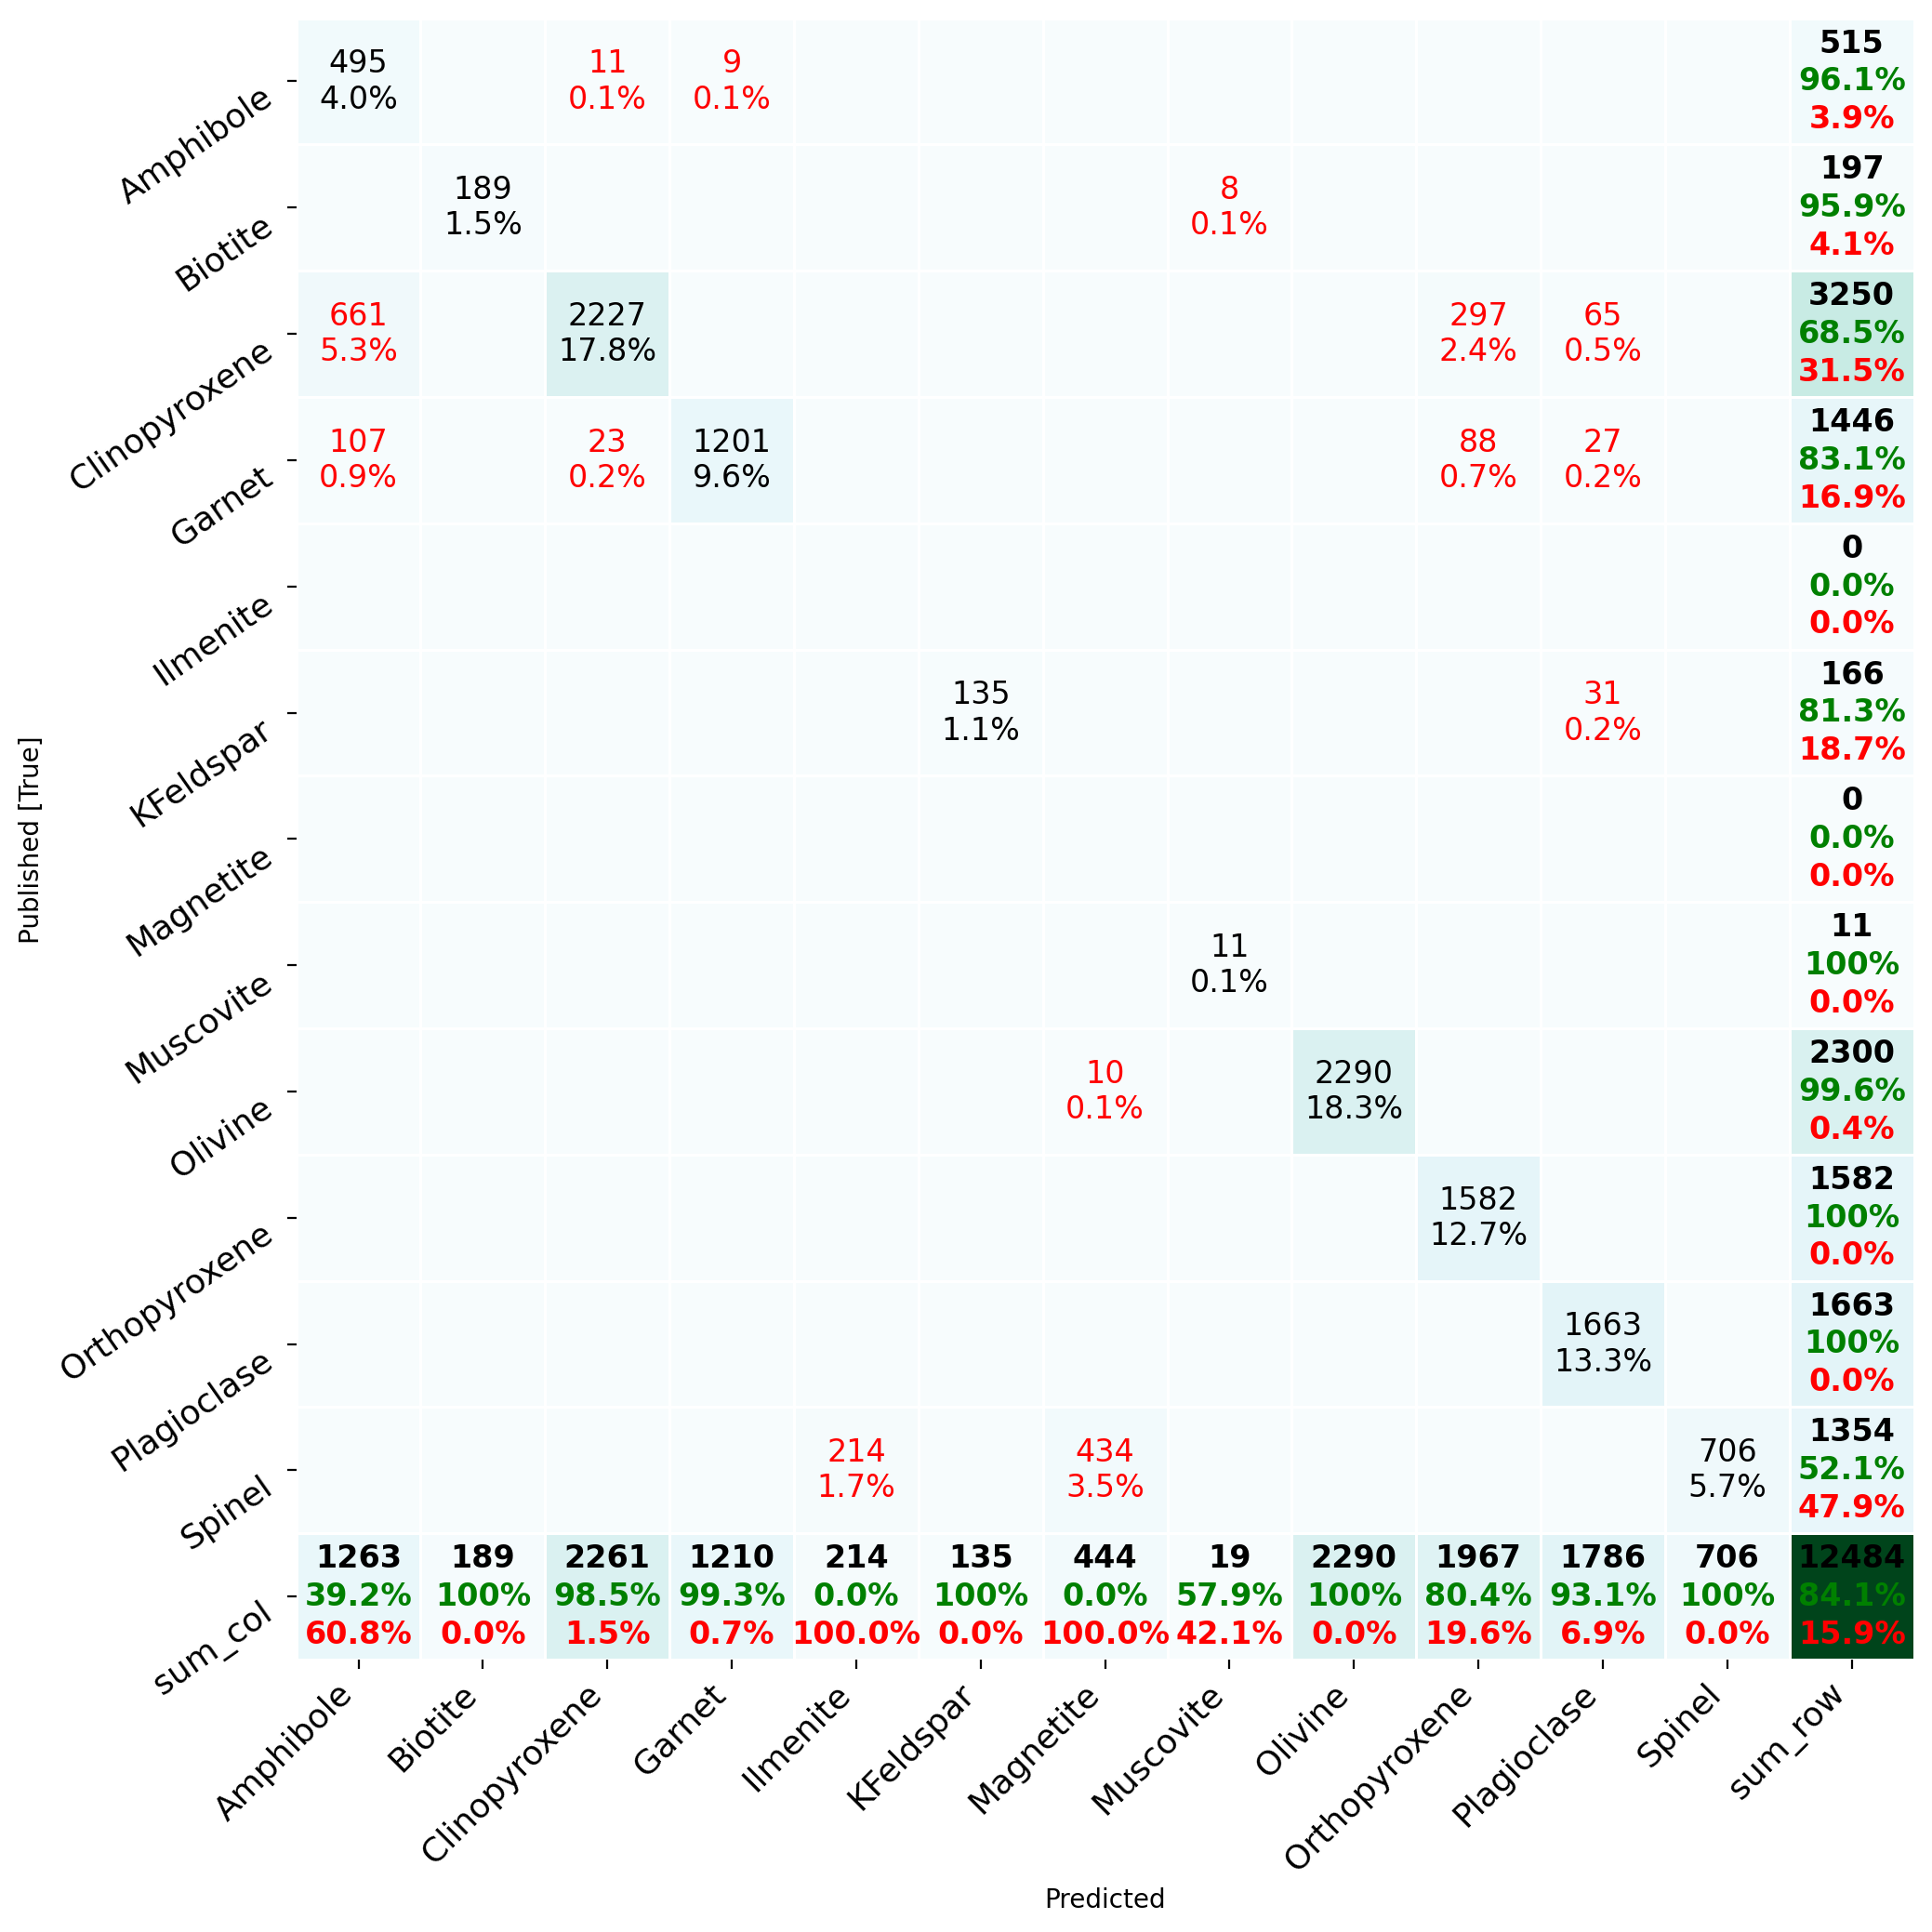

In [18]:

# Create and plot a confusion matrix 

cm = mm.confusion_matrix_df(df_nn['Mineral'], df_pred_nn['Predict_Mineral'])
print("LEPR Confusion Matrix:\n", cm)
cm[cm < len(df_pred_nn['Predict_Mineral'])*0.0005] = 0
mm.pp_matrix(cm, savefig = None) 


Excellent, these classifications now provide the most likely minerals, along with associated probabilities. Let's turn to unsupervised learning, to visualize these minerals in latent space. 

# I. Unsupervised Machine Learning with Autoencoders and Clustering (HDBSCAN)

# Prepare the same CSV as above for analysis: 

In [19]:

df_ae, _ = mm.prep_df_ae(df_load)


# Apply the Bayesian neural network with variational inference to your data:

In [20]:

df_pred_ae = mm.predict_class_prob_ae(df_ae)


# Examine the output: 

In [21]:

df_pred_ae


,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Mineral,LV1,LV2,Predict_Code,Predict_Mineral,Predict_Probability
0,47.240002,1.58,11.74,14.050000,0.25,11.11,10.12,1.69,0.82,0.00,Amphibole,0.679427,-0.292025,17,Garnet,0.835011
1,50.110001,1.71,9.42,15.250000,0.23,11.65,9.84,1.42,0.81,0.00,Amphibole,0.706672,-0.345205,17,Garnet,0.355738
2,47.810001,1.56,11.19,14.250000,0.27,12.30,10.04,1.64,0.77,0.00,Amphibole,0.670771,-0.306235,17,Garnet,0.698093
3,45.410000,1.37,10.97,16.770000,0.32,11.60,10.14,1.61,0.57,0.00,Amphibole,0.645060,-0.299439,17,Garnet,1.000000
4,47.970001,1.73,8.36,17.629999,0.27,12.10,9.44,1.29,0.59,0.00,Amphibole,0.684811,-0.363699,17,Garnet,0.299037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,0.000000,1.99,7.94,66.600000,0.00,11.59,0.00,0.00,0.00,1.39,Spinel,-0.337525,-1.293987,16,Ilmenite,0.324131
12608,0.000000,1.44,14.74,51.440000,0.00,6.89,0.00,0.00,0.00,22.85,Spinel,-0.177222,0.234567,10,Biotite,0.929504
12609,0.000000,23.64,2.24,64.410000,0.00,2.41,0.00,0.00,0.00,1.01,Spinel,-0.787791,-1.409545,0,Rutile,0.000590
12610,0.000000,0.40,14.93,24.340000,0.00,7.40,0.00,0.00,0.00,48.89,Spinel,-0.085247,0.163938,10,Biotite,0.804658


# Plot your data in latent space: 

In [ ]:

mm.plot_latent_space(df_pred_ae)
